In [52]:
# Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
# reading csv
glass = pd.read_csv(r'C:\Users\Training Team\Desktop\ExcelR\Assignments\KNN\glass.csv') 

In [5]:
# copying csv to new variable
import copy
df = copy.deepcopy(glass)

In [6]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### Asking basic questionson data

### 1. what is shape of data?

In [7]:
df.shape

(214, 10)

### 2. what does the data look like?

In [8]:
df.sample(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
55,1.51769,12.45,2.71,1.29,73.70,0.56,9.06,0.0,0.24,1
94,1.51629,12.71,3.33,1.49,73.28,0.67,8.24,0.0,0.00,2
43,1.52210,13.73,3.84,0.72,71.76,0.17,9.74,0.0,0.00,1
75,1.51590,13.02,3.58,1.51,73.12,0.69,7.96,0.0,0.00,2
66,1.52152,13.05,3.65,0.87,72.22,0.19,9.85,0.0,0.17,1


### 3. what are data type of the features in the data?

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


Here feature type needs to be in category format

In [11]:
df['Type']= df['Type'].astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   RI      214 non-null    float64 
 1   Na      214 non-null    float64 
 2   Mg      214 non-null    float64 
 3   Al      214 non-null    float64 
 4   Si      214 non-null    float64 
 5   K       214 non-null    float64 
 6   Ca      214 non-null    float64 
 7   Ba      214 non-null    float64 
 8   Fe      214 non-null    float64 
 9   Type    214 non-null    category
dtypes: category(1), float64(9)
memory usage: 15.6 KB


### 4. Are there any missing values in the data?

In [47]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

### 5. Are there any duplicates in the data?

In [18]:
df.duplicated().sum()

1

In [17]:
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [20]:
# lets drop the duplicated row
df = df.drop_duplicates()

In [22]:
# shape of data after dropping duplicates 
df.shape

(213, 10)

### 6. How does the data look numerically?

In [23]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


### 7. Any correlation between the features?

In [24]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000


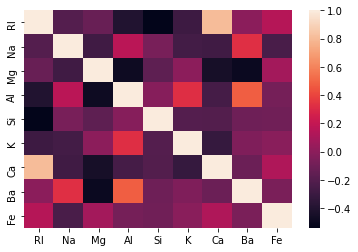

In [25]:
sns.heatmap(df.corr())

it can be seen that there is strong positive correlation between the RI and CA.
Also there is moderate negative corralation between RI and Si.
and so on

## Let's get insight into data (EDA)

In [27]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [28]:
features= ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

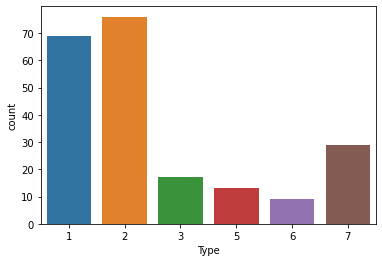

In [36]:
sns.countplot(df['Type'])

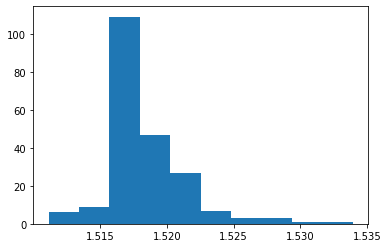

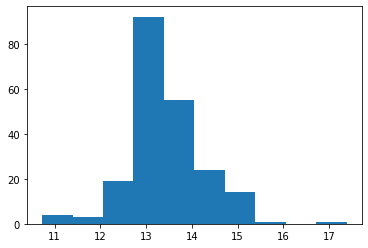

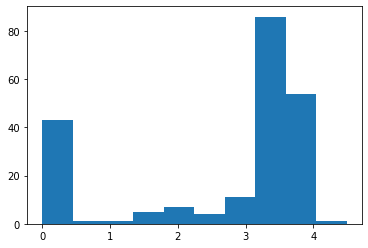

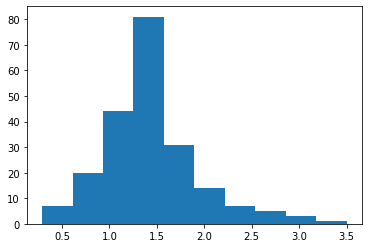

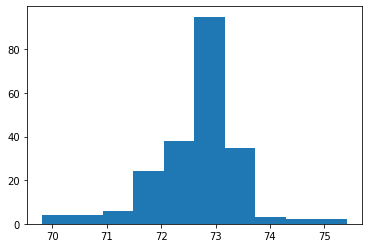

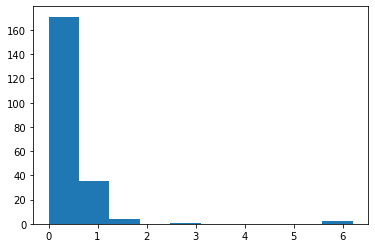

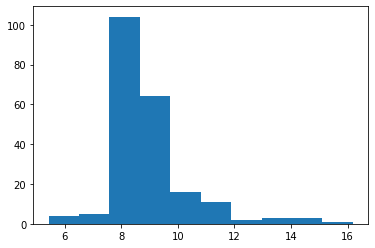

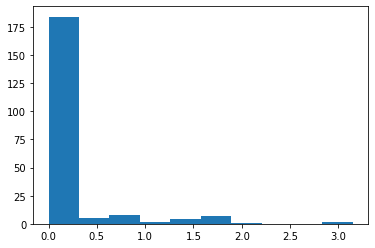

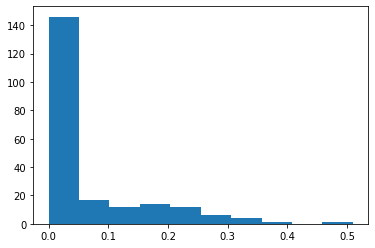

In [40]:
for feature in features:
    plt.hist(df[feature])
    plt.show()

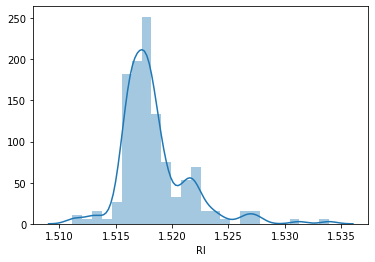

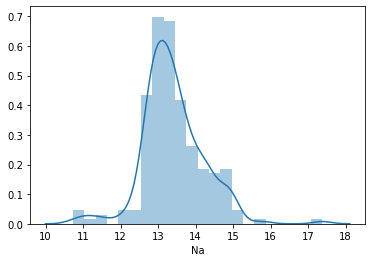

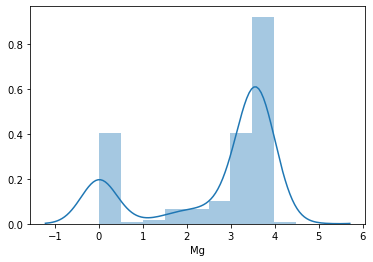

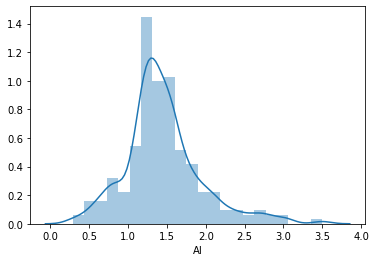

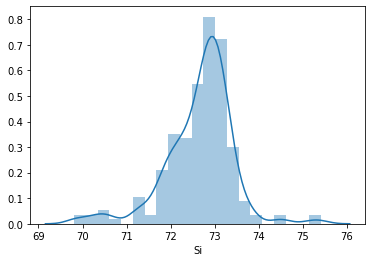

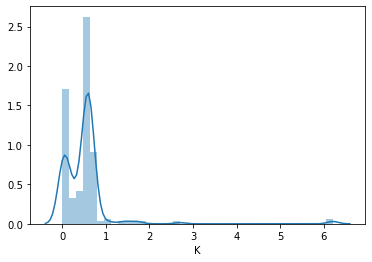

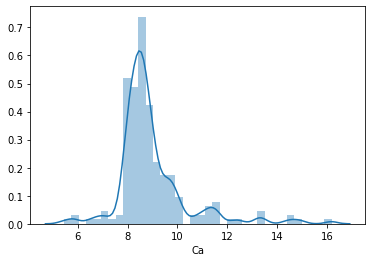

C:\Users\Training Team\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


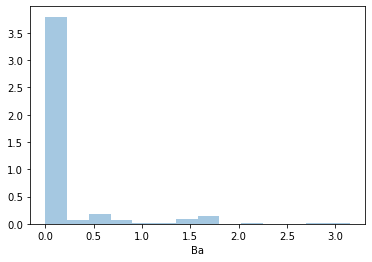

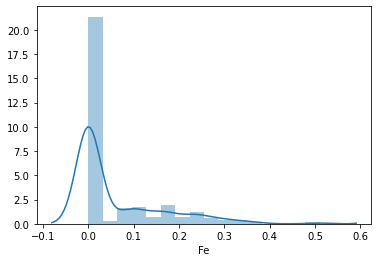

In [41]:
for feature in features:
    sns.distplot(df[feature])
    plt.show()

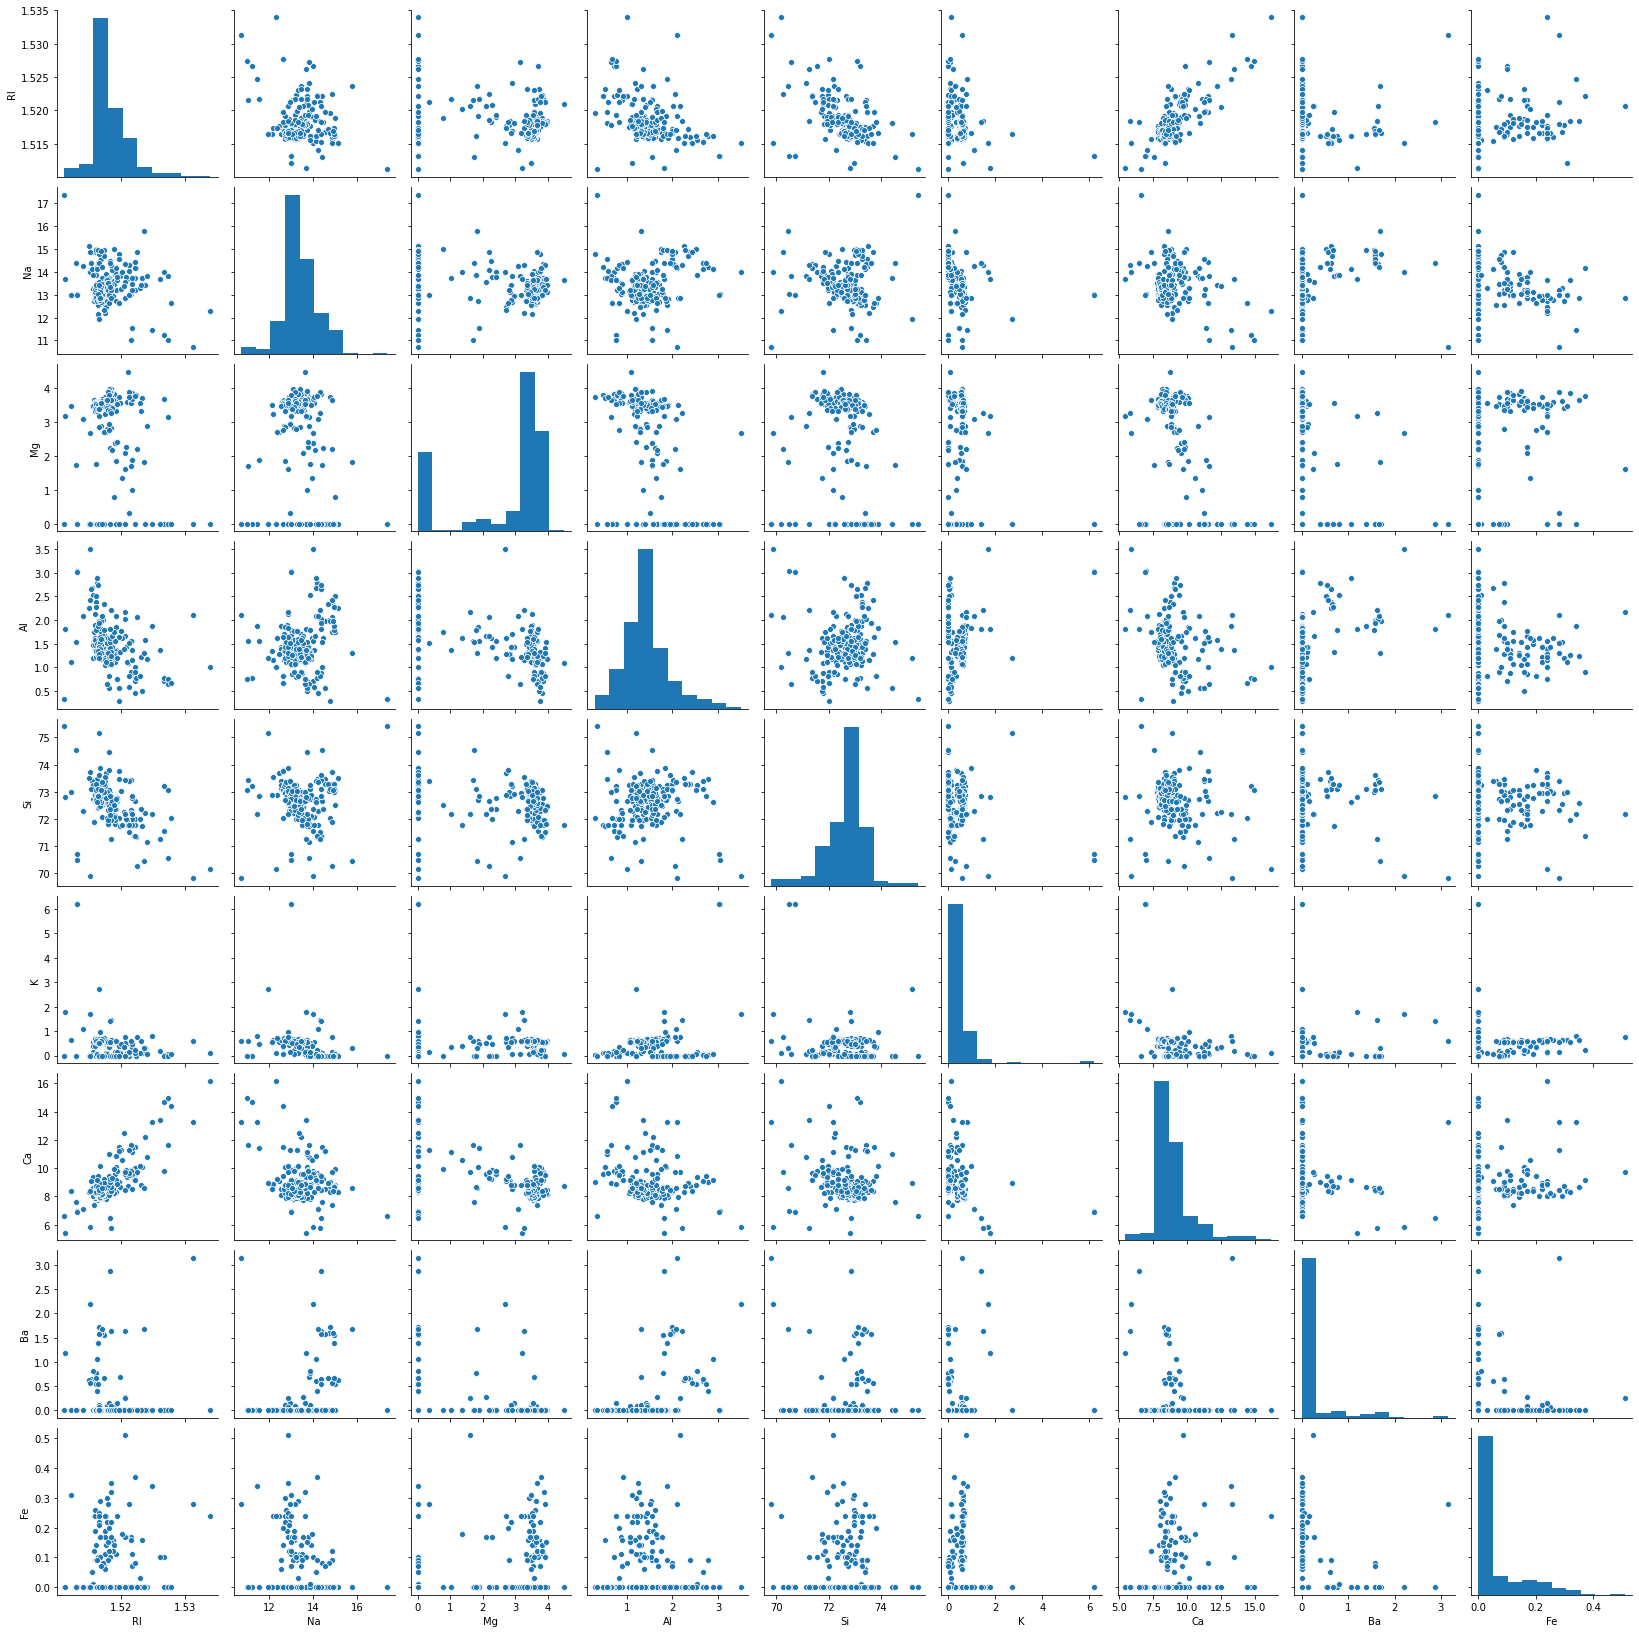

In [42]:
sns.pairplot(df[features])

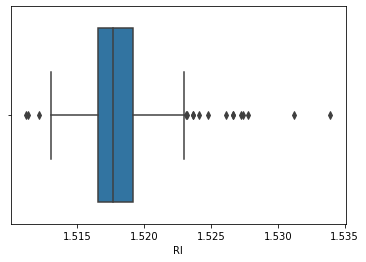

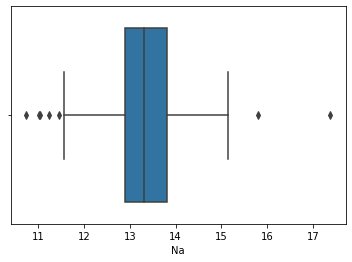

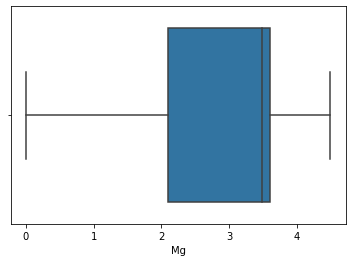

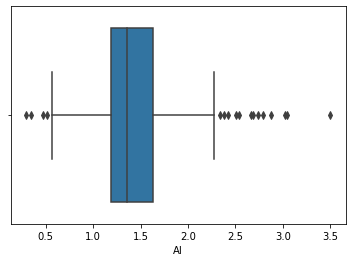

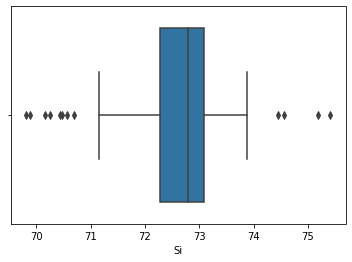

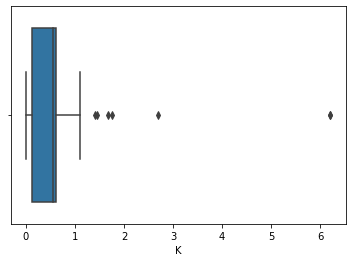

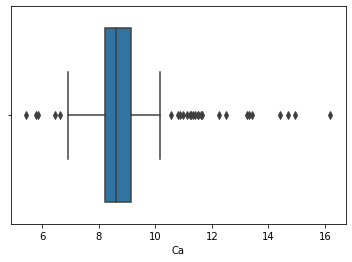

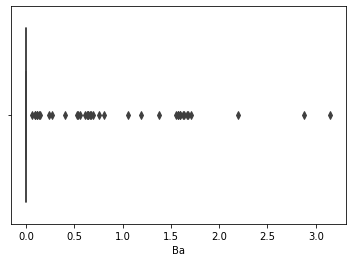

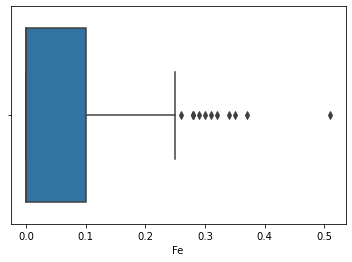

In [43]:
for feature in features:
    sns.boxplot(df[feature])
    plt.show()

## Data Preprocessing
MinMax Scaling- Since, there is difference of units between the different features. we need to apply the min-max scaling in order to bring the data into uniform scale. This will improve the performance of model ince we are using the distances in KNN

In [48]:
# lets split the into the input and target variable
X= df.iloc[:, 0:-1]
y= df.iloc[:, -1]

In [50]:
# Spliting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [94]:
# transformer
trf1 = MinMaxScaler() 

In [103]:
features

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

In [104]:
preprocessor = ColumnTransformer( 
                    transformers= [
                        ('scaling', trf1, features)
                    ])

In [107]:
pipe = Pipeline(steps= 
               [('Preprocessor', preprocessor)]
               )

In [109]:
X_train = pipe.fit_transform(X_train)

In [117]:
X_test = pipe.transform(X_test) 

In [110]:
X_train

array([[0.20939421, 0.32030075, 0.78396437, ..., 0.20961538, 0.        ,
        0.        ],
       [0.48112379, 0.52030075, 0.84187082, ..., 0.32211538, 0.        ,
        0.7254902 ],
       [0.67998244, 0.07518797, 0.        , ..., 0.85480769, 0.        ,
        0.        ],
       ...,
       [0.20851624, 0.37744361, 0.74387528, ..., 0.23365385, 0.        ,
        0.        ],
       [0.08077261, 0.5518797 , 0.38752784, ..., 0.17307692, 0.        ,
        0.        ],
       [0.70676032, 0.46165414, 0.70155902, ..., 0.5625    , 0.        ,
        0.        ]])

In [114]:
# Calling classifier 
knn = KNeighborsClassifier()

In [116]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [118]:
y_pred = knn.predict(X_test)

In [120]:
# checking the accuracy
acc = accuracy_score(y_test, y_pred)
acc

0.6511627906976745

In [122]:
from sklearn.metrics import classification_report, roc_auc_score

In [123]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.50      0.80      0.62        10
           2       0.69      0.73      0.71        15
           3       0.00      0.00      0.00         3
           5       1.00      0.33      0.50         3
           6       1.00      0.33      0.50         3
           7       0.78      0.78      0.78         9

    accuracy                           0.65        43
   macro avg       0.66      0.50      0.52        43
weighted avg       0.66      0.65      0.62        43



C:\Users\Training Team\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [128]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Create new KNN object
knn_2 = KNeighborsClassifier()

#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

#Fit the model
best_model = clf.fit(X_train,y_train)

#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

C:\Users\Training Team\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Best leaf_size: 1
Best p: 1
Best n_neighbors: 8


In [129]:
# modelling using the optimum hyperparapmeters
knn3 = KNeighborsClassifier(leaf_size= 1, n_neighbors= 8, p= 1)
knn3.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=8, p=1)

In [192]:
y_pred = knn3.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.57      0.80      0.67        10
           2       0.73      0.53      0.62        15
           3       0.50      0.67      0.57         3
           5       0.50      0.67      0.57         3
           6       1.00      0.67      0.80         3
           7       1.00      0.89      0.94         9

    accuracy                           0.70        43
   macro avg       0.72      0.70      0.69        43
weighted avg       0.74      0.70      0.70        43



Hence, it can be seen that the accuracy has improved (up by 5%) after the hyperparametertuning
Lets rework the problem with outlier treatment

In [131]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [136]:
df1= copy.deepcopy(df)

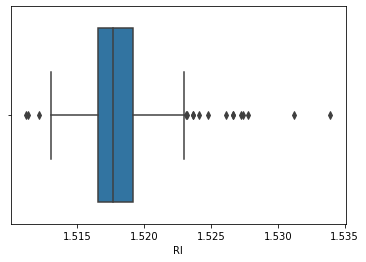

In [141]:
sns.boxplot(df1['RI'])

In [145]:
# Since RI is skewed data, we will have to use the IQR technique
RI_25th = df1['RI'].quantile(0.25)
RI_75th = df1['RI'].quantile(0.75)
RI_IQR = RI_75th - RI_25th
RI_UL = RI_75th + 1.5 * RI_IQR
RI_LL = RI_25th - 1.5 * RI_IQR
print('RI_UL : {}, RI_LL : {}'.format(RI_UL, RI_LL))

RI_UL : 1.5230949999999999, RI_LL : 1.5125750000000002


In [156]:
# Since the data is very less, we will perform the capping
df1['RI'] = np.where(df1['RI'] > RI_UL, RI_UL, np.where(df1['RI'] < RI_LL, RI_LL, df1['RI']) ) 

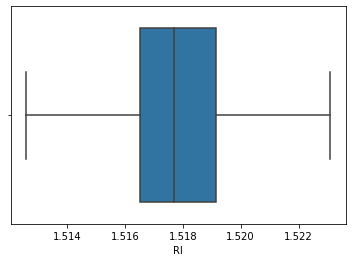

In [157]:
sns.boxplot(df1['RI'])

In [158]:
df1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


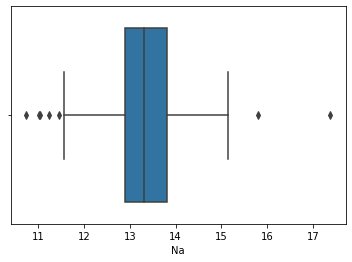

In [159]:
sns.boxplot(df1['Na'])

In [160]:
# Since Na is skewed data, we will have to use the IQR technique
Na_25th = df1['Na'].quantile(0.25)
Na_75th = df1['Na'].quantile(0.75)
Na_IQR = Na_75th - Na_25th
Na_UL = Na_75th + 1.5 * Na_IQR
Na_LL = Na_25th - 1.5 * Na_IQR
print('Na_UL : {}, Na_LL : {}'.format(Na_UL, Na_LL))

# Capping
df1['Na'] = np.where(df1['Na'] > Na_UL, Na_UL, np.where(df1['Na'] < Na_LL, Na_LL, df1['Na']) ) 

Na_UL : 15.175, Na_LL : 11.535


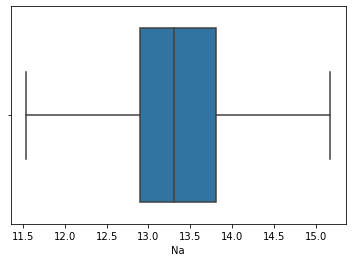

In [161]:
sns.boxplot(df1['Na'])

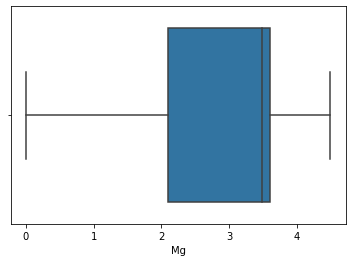

In [163]:
sns.boxplot(df1['Mg'])

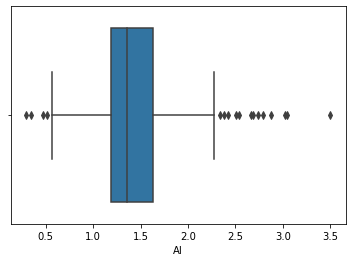

In [164]:
sns.boxplot(df1['Al'])

In [165]:
# Since Na is skewed data, we will have to use the IQR technique
Al_25th = df1['Al'].quantile(0.25)
Al_75th = df1['Al'].quantile(0.75)
Al_IQR = Al_75th - Al_25th
Al_UL = Al_75th + 1.5 * Al_IQR
Al_LL = Al_25th - 1.5 * Al_IQR
print('Al_UL : {}, Al_LL : {}'.format(Al_UL, Al_LL))

# Capping
df1['Al'] = np.where(df1['Al'] > Al_UL, Al_UL, np.where(df1['Al'] < Al_LL, Al_LL, df1['Al']) )

Al_UL : 2.29, Al_LL : 0.53


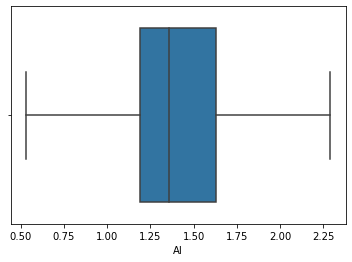

In [166]:
sns.boxplot(df1['Al'])

In [167]:
df1.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

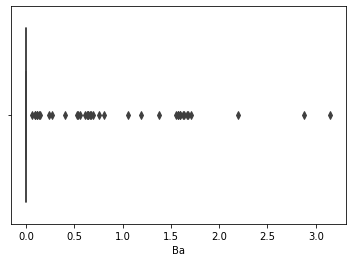

In [175]:
sns.boxplot(df1['Ba'])

In [176]:
# Since Ba is skewed data, we will have to use the IQR technique
Ba_25th = df1['Ba'].quantile(0.25)
Ba_75th = df1['Ba'].quantile(0.75)
Ba_IQR = Ba_75th - Ba_25th
Ba_UL = Ba_75th + 1.5 * Ba_IQR
Ba_LL = Ba_25th - 1.5 * Ba_IQR
print('Ba_UL : {}, Ba_LL : {}'.format(Ba_UL, Ba_LL))

Ba_UL : 0.0, Ba_LL : 0.0


In [184]:
# % outliers in feature Ba
(df1[df1['Ba'] > 0.0].shape[0])/df1.shape[0]*100

17.84037558685446

Lets not touch the these outliers since they high in nos

In [185]:
# lets split the into the input and target variable
X1= df1.iloc[:, 0:-1]
y1= df1.iloc[:, -1]

In [186]:
# Spliting data into train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state= 42)

In [187]:
# transformer
trf11 = MinMaxScaler()

preprocessor1 = ColumnTransformer( 
                    transformers= [
                        ('scaling1', trf11, features)
                    ])

pipe1 = Pipeline(steps= 
               [('Preprocessor1', preprocessor1)]
               )

X1_train = pipe1.fit_transform(X1_train)

X1_test = pipe1.transform(X1_test)

# Hyperparameter tuning

#Create new KNN object
knn_3 = KNeighborsClassifier()

#Use GridSearch
clf = GridSearchCV(knn_3, hyperparameters, cv=10)

#Fit the model
best_model = clf.fit(X1_train,y1_train)

#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

C:\Users\Training Team\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Best leaf_size: 1
Best p: 1
Best n_neighbors: 1


In [188]:
# modelling using the optimum hyperparapmeters
knn3 = KNeighborsClassifier(leaf_size= 1, n_neighbors= 1, p= 1)
knn3.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=1, p=1)

In [190]:
y_pred = knn3.predict(X1_test)
print(classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

           1       0.57      0.40      0.47        10
           2       0.43      0.40      0.41        15
           3       0.33      0.33      0.33         3
           5       0.38      1.00      0.55         3
           6       1.00      0.67      0.80         3
           7       0.89      0.89      0.89         9

    accuracy                           0.56        43
   macro avg       0.60      0.61      0.58        43
weighted avg       0.59      0.56      0.56        43



Hence it can be seen that the accuracy has been decreased after the outlier treatment as data is smaller and treating outliers impacts the predictions made